# Gaming Stocks Analysis
---

## Author Information

Name : Darryn Johnson

Date last updated : 11/28/2024

---
## Sources and Links

Original Kaggle dataset : [Video Game Stocks: Financial Market Data](https://www.kaggle.com/datasets/datadrivenx/video-game-stocks-financial-market-data)

---
# Overview

---
# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
# Reproducability

To reproduce these results yourself, open google colab and locate this github repo under my github account. From there, simply run the notebook from start to finish.

In [2]:
# !kaggle datasets download -d datadrivenx/video-game-stocks-financial-market-data
# !unzip datadrivenx/video-game-stocks-financial-market-data

---
# Business Understanding 

The purpose of the following notebook is to look into patters in the stock market ragerding gaming tech companies. This is valuable to shareholders and investors as it gives insigt to the iner-workings of this specific field, and can inform a decision.

- Business Objectives
    - analize stock data to locate a trend
- Situation Assesement
    - resources available
        - stock opening/closing prices, trading volume, and other relevant financial indicators
    - resources unavailable
        - undisclosed internal information such as :
            - upcoming unanounced releases
            - internal stresses that may cause unpredictable outcomes
- Data Mining Goal
    - assess and understand the data provided
- Project plan
    - produce accurate and usable metrics to inform a decision regarding stock market investments

---
# Data Understanding 
Let's take a quick look into what the data we are working with actually is. In this case, we have metadata, which is just data about the data.  

## Column Metadata

- Company
    - The name of the video game company
- Ticker Symbol
    - The stock's unique symbol used for trading
- Currency
    - The currency used for the stock's price
        - USD - United States Dollar | 1 : 1 USD
        - JPY - Japanese Yen | 1 JPY : 0.0067 USD
        - HKD - Hong Kong Dollar | 1 HKD : 0.13 USD
        - SEK - Swedish Krona | 1 SEK : 0.092 USD
- Open
    - The stock price at market open for the given day
- High
    - The highest stock price during the trading day
- Low
    - The lowest stock price during the trading day
- Close
    - The stock price at market close for the given day
- Adj Close
    - The adjusted closing price, accounting for dividends and stock splits
        - dividends
            - a payment to a shareholder with additional stocks rather then money
        - stock splits
            - spliting owned stocks into smaller subsets, while maintaining the overall value of the stocks 
- Volume
    - The total number of shares traded during the day

## Note From Original Dataset Creator

While _Epic Games_ and _MiHoYo_ are also major players in the video game industry, and would have ranked no. 7 and 10 respectively, they are privately held and do not have publicly traded stocks, so their financial data is not included in this dataset.

The dataset contains monthly data for the period from January 1, 2000, to October 31, 2024. The data was extracted using the Yahoo Finance library in Python, and includes key market metrics such as stock opening/closing prices, trading volume, and other relevant financial indicators.

---
# Data Distribution

---
# Data Preparation

---
## Methodology

---
# Functions

---
# Exploritory Data Analysis (EDA)

In [3]:
df = pd.read_csv('gaming_stocks.zip')

In [4]:
df.head()

,Date,Company,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume
0,2000-01-01,Sony Interactive Entertainment,SONY,JPY,28.525000,29.168751,20.850000,25.299999,14.535083,147012000
1,2000-02-01,Sony Interactive Entertainment,SONY,JPY,25.293751,31.475000,25.000000,31.350000,18.010864,67437000
2,2000-03-01,Sony Interactive Entertainment,SONY,JPY,30.100000,31.299999,21.700001,28.012501,16.093437,112674000
3,2000-04-01,Sony Interactive Entertainment,SONY,JPY,28.250000,28.250000,22.312500,22.562500,12.974537,74071000
4,2000-05-01,Sony Interactive Entertainment,SONY,JPY,22.700001,23.481251,17.750000,18.237499,10.487453,65035500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2209 non-null   object 
 1   Company        2209 non-null   object 
 2   Ticker Symbol  2209 non-null   object 
 3   Currency       2209 non-null   object 
 4   Open           2209 non-null   float64
 5   High           2209 non-null   float64
 6   Low            2209 non-null   float64
 7   Close          2209 non-null   float64
 8   Adj Close      2209 non-null   float64
 9   Volume         2209 non-null   int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 172.7+ KB


In [6]:
df['Company'].value_counts()

Company
Sony Interactive Entertainment       298
Microsoft Gaming                     298
Nintendo                             298
Electronic Arts                      298
Take-Two Interactive                 298
NetEase Games                        292
Tencent Interactive Entertainment    244
Embracer Group                        95
Playtika                              45
Roblox Corporation                    43
Name: count, dtype: int64

In [7]:
df['Currency'].value_counts()

Currency
USD    1572
JPY     298
HKD     244
SEK      95
Name: count, dtype: int64

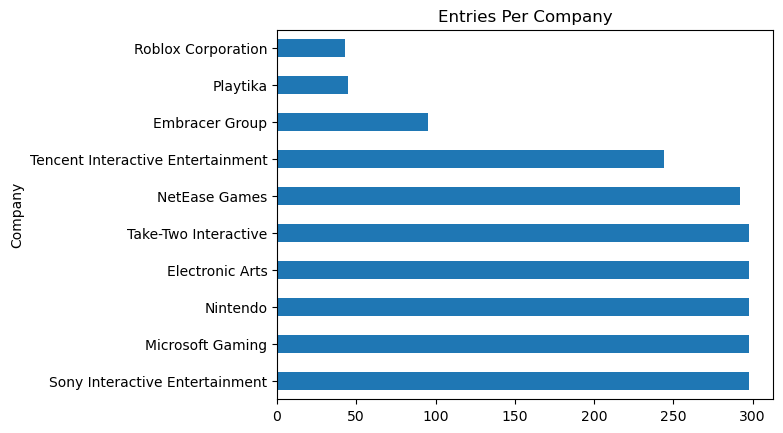

In [8]:
fig, ax = plt.subplots()
df['Company'].value_counts().plot(kind = 'barh')
ax.set_title('Entries Per Company')
plt.show();

In [9]:
df['Open Value in USD'] = ''

for ind, row in df.iterrows():
    if row.iloc[3] == 'JPY':
        df.loc[ind, 'Open Value in USD'] = row['Open'] * 0.0067
    elif row.iloc[3] == 'HKD':
        df.loc[ind, 'Open Value in USD'] = row['Open'] * 0.13
    elif row.iloc[3] == 'SEK':
        df.loc[ind, 'Open Value in USD'] = row['Open'] * 0.092
    elif row.iloc[3] == 'USD':
        df.loc[ind, 'Open Value in USD'] = row['Open']

In [10]:
df[df['Currency'] == 'JPY'].head()

,Date,Company,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume,Open Value in USD
0,2000-01-01,Sony Interactive Entertainment,SONY,JPY,28.525000,29.168751,20.850000,25.299999,14.535083,147012000,0.191117
1,2000-02-01,Sony Interactive Entertainment,SONY,JPY,25.293751,31.475000,25.000000,31.350000,18.010864,67437000,0.169468
2,2000-03-01,Sony Interactive Entertainment,SONY,JPY,30.100000,31.299999,21.700001,28.012501,16.093437,112674000,0.20167
3,2000-04-01,Sony Interactive Entertainment,SONY,JPY,28.250000,28.250000,22.312500,22.562500,12.974537,74071000,0.189275
4,2000-05-01,Sony Interactive Entertainment,SONY,JPY,22.700001,23.481251,17.750000,18.237499,10.487453,65035500,0.15209


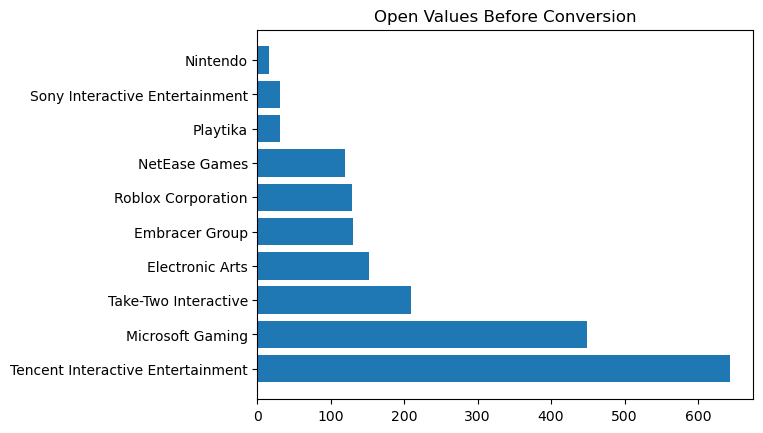

In [28]:
fig, ax = plt.subplots()
df_sorted = df.sort_values(by = 'Open', ascending = False)
x = df_sorted['Company']
y = df_sorted['Open']
ax.barh(x, y)
ax.set_title('Open Values Before Conversion')
plt.show();

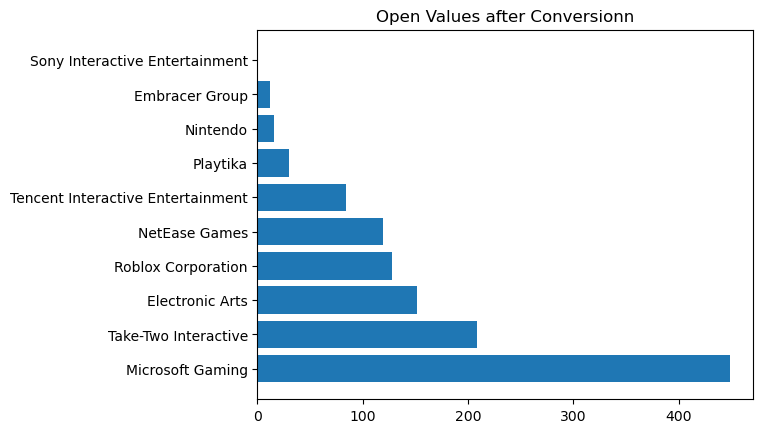

In [16]:
fig, ax = plt.subplots()
df_sorted_1 = df.sort_values(by = 'Open Value in USD', ascending = False)
x = df_sorted_1['Company']
y = df_sorted_1['Open Value in USD']
ax.barh(x, y)
ax.set_title('Open Values after Conversion')
plt.show();

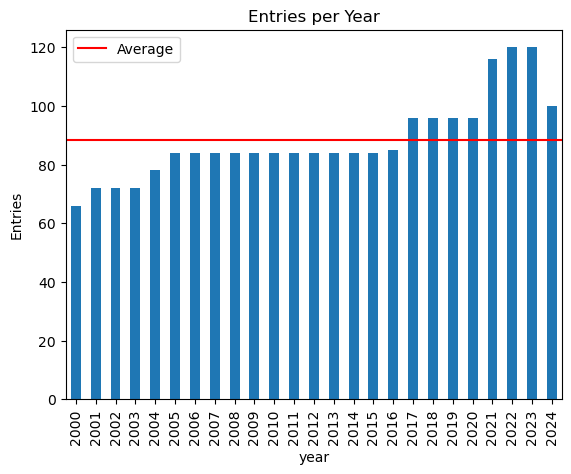

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
entries_per_year = df.groupby('year').size()

fig, ax = plt.subplots()

ax.set_title('Entries per Year')
ax.set_ylabel('Entries')
avg = sum(entries_per_year) / len(entries_per_year)
ax.axhline(avg, color = 'r')
entries_per_year.plot(kind = 'bar')
plt.legend(['Average'])
plt.show();

In [14]:
print(avg)

88.36


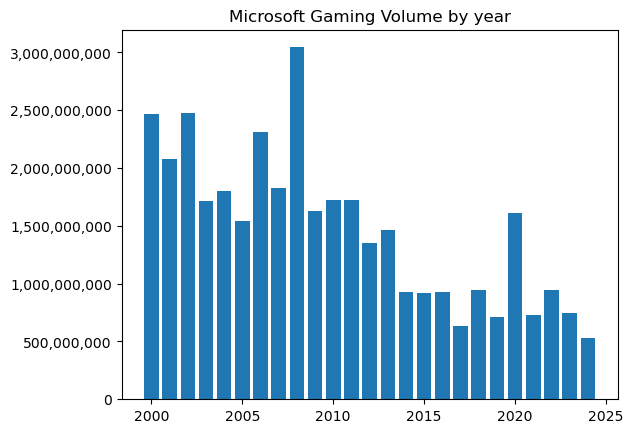

In [15]:
df_micro = df[df['Company'] == 'Microsoft Gaming']

fig, ax = plt.subplots()

x = df_micro['year']
y = df_micro['Volume']
ax.set_title('Microsoft Gaming Volume by year')

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels
ax.bar(x, y)
plt.show();

df['Open Value in USD'] = ''

for ind, row in df.iterrows():
    if row.iloc[3] == 'JPY':
        df.loc[ind, 'Open Value in USD'] = row['Open'] * 0.0067
    elif row.iloc[3] == 'HKD':
        df.loc[ind, 'Open Value in USD'] = row['Open'] * 0.13
    elif row.iloc[3] == 'SEK':
        df.loc[ind, 'Open Value in USD'] = row['Open'] * 0.092
    elif row.iloc[3] == 'USD':
        df.loc[ind, 'Open Value in USD'] = row['Open']

In [19]:
df_micro.head()

,Date,Company,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume,Open Value in USD,year
542,2000-01-01,Microsoft Gaming,MSFT,USD,58.68750,59.3125,47.43750,48.93750,30.174570,1274875200,58.6875,2000
543,2000-02-01,Microsoft Gaming,MSFT,USD,49.25000,55.0000,44.06250,44.68750,27.554047,1334487600,49.25,2000
544,2000-03-01,Microsoft Gaming,MSFT,USD,44.81250,57.5000,44.46875,53.12500,32.756535,2028187600,44.8125,2000
545,2000-04-01,Microsoft Gaming,MSFT,USD,47.21875,48.2500,32.50000,34.87500,21.503712,2258146600,47.21875,2000
546,2000-05-01,Microsoft Gaming,MSFT,USD,36.43750,37.0000,30.18750,31.28125,19.287834,1344430800,36.4375,2000
